In [213]:
#import pandas
import pandas as pd
 # load dataset
pima = pd.read_csv("diabetes.csv")

In [214]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [215]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [216]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']

X = pima[feature_cols] # Features
y = pima.Outcome # Target variable
 

In [217]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [218]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000) # max_iter=1000

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

# Visualizing Confusion Matrix using Heatmap

[[118  12]
 [ 26  36]]


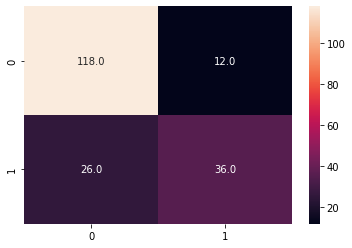

In [219]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
print(cm)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True ,fmt=".1f")
plt.savefig('confusion.png')

In [220]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

In the output, 117 and 38 are actual predictions, and 24 and 13 are incorrect predictions.

In [221]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

y_pred=logreg.predict(X_train)
y_pred_probs=logreg.predict_proba(X_train)[:,1]

train_accuracy = accuracy_score(y_train, y_pred)*100
train_auc_roc = roc_auc_score(y_train, y_pred_probs)*100 

print('Confusion matrix:\n', confusion_matrix(y_train, y_pred))


print('Training AUC: %.4f %%' % train_auc_roc)

print('Training accuracy: %.4f %%' % train_accuracy)

Confusion matrix:
 [[323  47]
 [ 87 119]]
Training AUC: 83.0701 %
Training accuracy: 76.7361 %


In [222]:
y_test_hat = logreg.predict(X_test)
y_test_hat_probs = logreg.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy) 

Confusion matrix:
 [[118  12]
 [ 26  36]]
Testing AUC: 86.1042 %
Testing accuracy: 80.2083 %


# ROC Curve

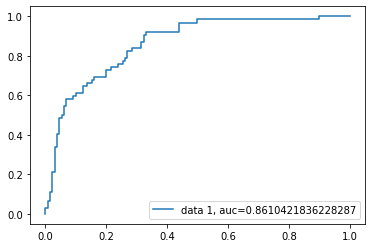

In [223]:
import matplotlib.pyplot as plt

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()